In [47]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir 
from PIL import * 
import random
import math
import string as str


In [48]:
#create a matrix that contains all the dimensions for each image
Dist="D:\\NU\\fall 2017\\CIT machine learning\\lab3\\Problem 2 Dataset\\"
trainFiles = [f for f in listdir(Dist+"Noise Train\\")] #names of train files
result= pd.DataFrame(index=range(1,144))
labels=[i[2] for i in trainFiles] #save the labels to compare them with our classifier output
for i in trainFiles:
    fileN = Dist+"Noise Train\\" + i
    im = Image.open(fileN)
    imArr = np.array(list(im.getdata()))
    imArr=pd.DataFrame(imArr)
    result = pd.concat([result, imArr], axis=1)
#result.T to transpose the matrix.. it turns out that eculidian distance built-in function compare between rows not columns so we ..
#..transposed the matrix to make each row represent one image so the eculidan distances can compare images' distances
trainData=result.T 
print (trainData)


    0    1    2    3    4    5    6    7    8    9   ...   134  135  136  137  \
0     0  255  251    0  255   10  242  255  252  248 ...   248  255  240  237   
0     8  249  248  250  248  255  253  242  252  255 ...   255  255  251  250   
0     0   16  246  248    3  255    0  255  240   13 ...   245  255  227  255   
0     0    0  249  255  255  234    6  255  247  255 ...   250    0  255  230   
0   255   20    0  246  255  248  248  245  253  254 ...   248    1  238  255   
0     0    8  247  248  255  245    0  253  251   19 ...   255  250  230  255   
0     0    1  248  251  255  255    0  255  248  255 ...   255  240  255  234   
0   255  188  255  237  252  255    3    0    0   13 ...   246  241  255  246   
0   182  255  246    3  255   30   12    7    0  255 ...   231  255  255    0   
0   183  255  242  250  254   29    0   11    0   28 ...   248  255  243  255   
0   192  244  246  255  247  253    7    0    4    0 ...   251    0  253  253   
0   178  207  249  242    0 

In [49]:
#getting the eculidean distances between all points

distances=euclidean_distances(trainData)
print (distances)
#print (distances[0])
#df1 = result.iloc[:,0:1]
#df1=df1.values
#df2 = result.iloc[:,1:2]
#df2=df2.values
#print (res)
#print(result.a.to_string(index=False))
#y=0
#for i in range(0,144):
#    y=y+((df1[i]-df2[i])**2)
#print (math.sqrt(y))

[[    0.          1662.136276    1591.05185333 ...,  1862.50422818
   1869.83715869  1919.82342938]
 [ 1662.136276       0.          1749.46877651 ...,  1853.2174724
   1864.62382265  1865.1860497 ]
 [ 1591.05185333  1749.46877651     0.         ...,  1910.01727741
   1808.74956807  1814.89889526]
 ..., 
 [ 1862.50422818  1853.2174724   1910.01727741 ...,     0.          1562.07138121
   1610.87429677]
 [ 1869.83715869  1864.62382265  1808.74956807 ...,  1562.07138121     0.
   1579.60469738]
 [ 1919.82342938  1865.1860497   1814.89889526 ...,  1610.87429677
   1579.60469738     0.        ]]


In [50]:
#check if the k nearest points vote equally for two classifications, so we take the decisions based on K-1 voting
def TieCheck():
    repeated=[]
    for i in range(0,len(voting)):
        repeated.append(voting.count(voting[i]))
    if (max(repeated)< repeated.count(max(repeated))):
#                     print("tie")
        mini=new_distances.argsort()[0:1]
        index, = np.where( distances[test]==new_distances[mini])
        decision=labels[index[0]]
    else:
        decision=max(set(voting), key=voting.count) #get the dominant cluster
    return (decision)


In [59]:
#Training, get the best K for classifiying this data
k=100
errorssum=[]
for j in range(0,10):
    #Cross Validation, 20% of the sample test, 80% training 
    percent20=(random.sample(range(0, 182), 36))
    for i in range(1, k+1):
        error=0
        for test in percent20:
            #Eliminate the 20% testing data so we are left with the 80% training data
            new_distances = np.delete(distances[test], percent20)
            mini=new_distances.argsort()[0:i] #return the smallest k values of the array 
            KNN=[] # this array will be filled with indicies of k nearest neighbours
            for m in range(0,len(mini)):
                index, = np.where( distances[test]==new_distances[mini[m]]) #get the index of the minimumem values
                KNN.append(index[0])

            voting=[labels[KNN[m]] for m in range(0,len(KNN))]
            finaldecision=TieCheck()

            if finaldecision !=labels[test]:# check if the prediction is true, if not increase the error
                error=error+1
        errorssum.append(error)    

errorsaverage=[]
for i in range(0,100):
    E=0
    for j in range (0,10):
        E=E+errorssum[(100*j)+i]
    errorsaverage.append(E/10)
print (errorsaverage)
s_k=errorsaverage.index(min(errorsaverage))+1
print ("the smallest k=",s_k)



[4.3, 4.3, 3.7, 4.2, 4.3, 5.3, 5.9, 5.6, 5.7, 5.9, 5.9, 7.2, 7.7, 7.9, 8.6, 9.3, 9.4, 9.5, 9.7, 9.5, 9.2, 9.5, 10.4, 11.2, 11.7, 12.1, 12.6, 12.8, 13.2, 13.3, 13.8, 14.1, 14.1, 14.3, 14.3, 14.1, 14.6, 15.0, 15.1, 15.5, 15.9, 16.5, 16.9, 17.0, 17.9, 18.9, 19.3, 18.9, 19.1, 19.2, 19.6, 19.6, 20.0, 19.5, 19.1, 19.2, 19.6, 19.2, 19.0, 18.4, 18.2, 18.1, 17.6, 17.5, 17.8, 17.3, 17.5, 18.0, 17.4, 17.6, 17.0, 16.9, 17.0, 16.9, 16.5, 16.3, 16.3, 16.5, 16.3, 16.2, 16.2, 16.3, 16.2, 16.7, 16.4, 16.6, 17.0, 17.0, 16.4, 16.1, 15.8, 14.8, 14.7, 14.0, 13.6, 13.1, 12.5, 12.3, 12.1, 11.9]
the smallest k= 3


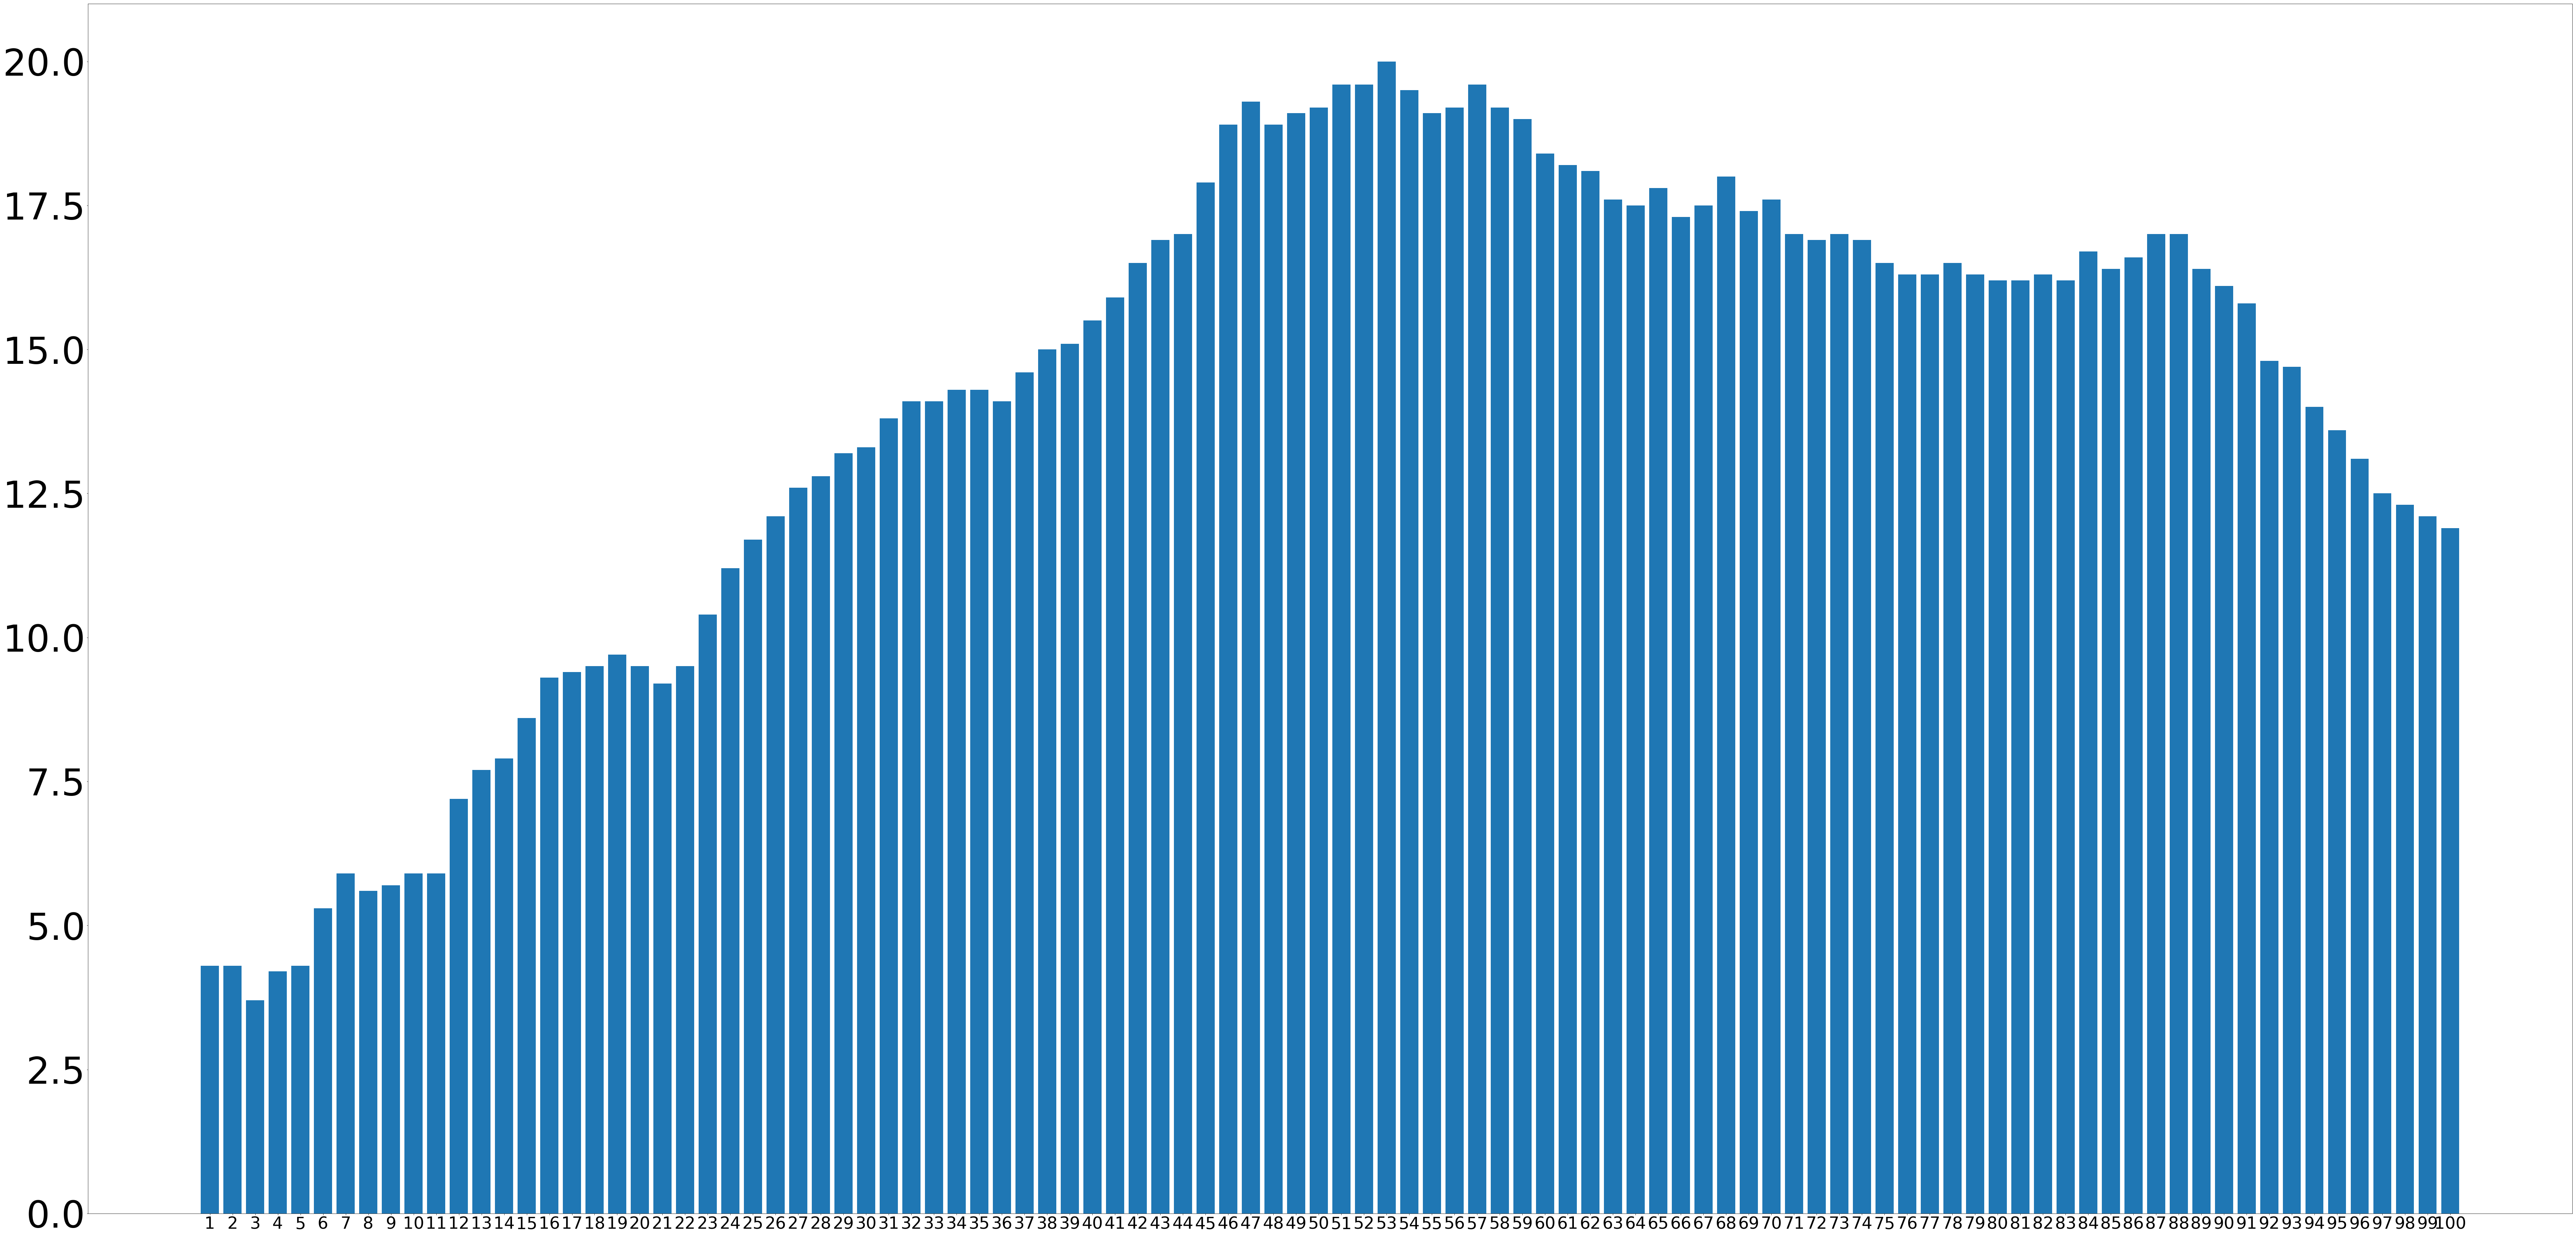

In [71]:
plt.bar(range(len(errorsaverage)), errorsaverage, align='center')
plt.xticks(range(0,100), list(range(1, 101)))
plt.rcParams['figure.figsize'] = (120, 60)
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=100)
plt.savefig(Dist+"\\KNN.jpg")
plt.show()


In [65]:
#B
testFiles = [f for f in listdir(Dist+"Noise Test\\")] #names of train files
noiseData= pd.DataFrame(index=range(1,144))
labelsTest=[i[2] for i in testFiles] #save the labels to compare them with our classifier output  
for i in testFiles:
    fileN = Dist+"Noise Test\\" + i
    im = Image.open(fileN)
    imArr = np.array(list(im.getdata()))
    imArr=pd.DataFrame(imArr)
    noiseData = pd.concat([noiseData, imArr], axis=1)
noiseData=noiseData.T
allData = pd.concat([trainData,noiseData], axis=0) 
testdistances=euclidean_distances(allData)
indiciesoftest=list(range(182, 234))
classified=[0]*26 # list to contain the classified charcters
characters=list(str.ascii_lowercase)
for test in range(0,52):
    new_distances = np.delete(testdistances[test+182], indiciesoftest)
    mini=new_distances.argsort()[0:s_k]
    KNN=[]
    for i in mini:
        KNN.append(labels[i])
    repeated=[]
    for j in range(0,s_k):
        repeated.append(KNN.count(KNN[j]))
    if (max(repeated)< repeated.count(max(repeated))): #check for die
        #print("tie")
        decision=labels[new_distances.argsort()[0:1][0]]
    else:
        decision=max(set(KNN), key=KNN.count)
    if (decision==labelsTest[test]):
        classified[characters.index(decision)]=classified[characters.index(decision)]+1
#    print ("decision is",decision)
#    print ("True is ",labelsTest[test])
print (classified)


[2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


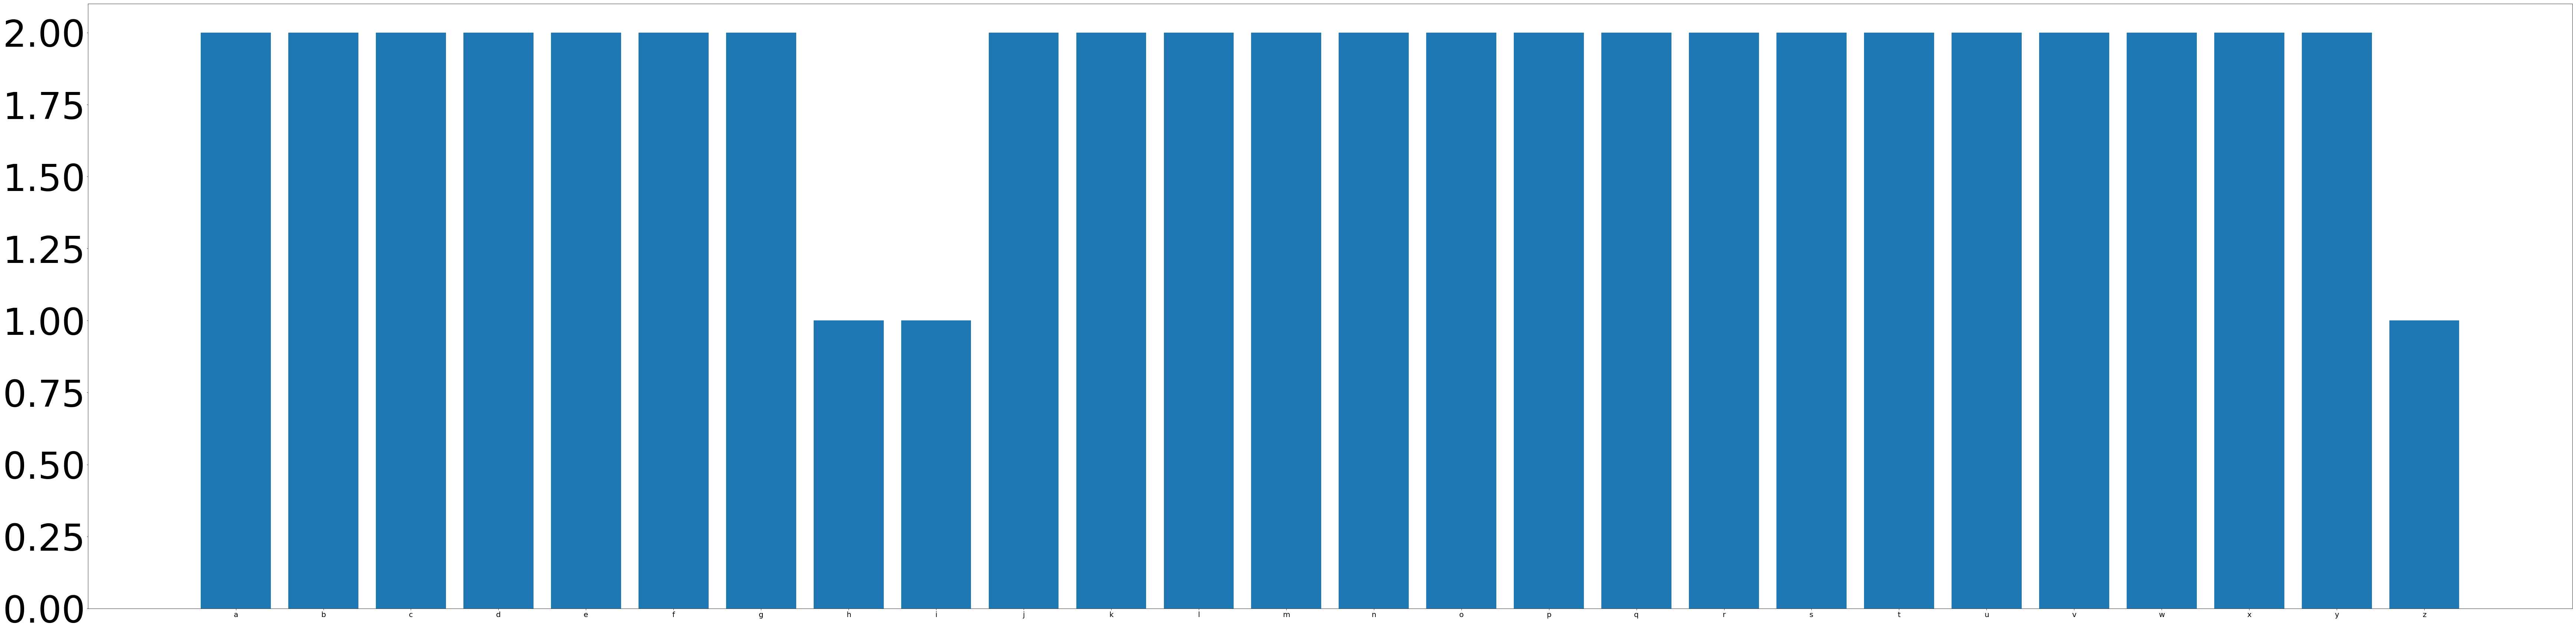

In [62]:
# plot classified images
plt.bar(range(len(classified)), classified, align='center')
plt.xticks(range(0,26), characters)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10)
plt.savefig(Dist+"\\Accuracy.jpg")
plt.show()

In [ ]:
voting=[m for m in range(0,len(KNN))]

In [ ]:
 voting=[]
            for m in range(0,len(KNN)):
                voting.append(labels[KNN[m]])